#Project Charter

1. **Dataset Acquisition and Loading** (10 Points)  
   **Owner**: Eslin  
   **Task**: Successfully located and loaded a large, relevant dataset with clear documentation.

2. **Structural Investigation** (10 Points)  
   **Owner**: Eslin  
   **Task**: Comprehensive structural analysis, including data types, unique values, etc.

3. **Quality Investigation** (10 Points)  
   **Owner**: Eslin  
   **Task**: Excellently cleaned dataset with well-documented steps.

4. **Data Integration** (10 Points)  
   **Owner**: Dona  
   **Task**: Effectively merged with a second dataset using appropriate methods.

5. **Data Binning** (10 Points)  
   **Owner**: Dona  
   **Task**: Effective binning with a well-justified strategy.

6. **Lambda Function Application** (10 Points)  
   **Owner**: Ciarra  
   **Task**: Excellent use of lambda function for data manipulation.

7. **Feature Engineering** (10 Points)  
   **Owner**: Ciarra  
   **Task**: Added a highly relevant and creative new feature.

8. **Exploratory Data Analysis** (20 Points)  
   **Owner**: Bianca  
   **Task**: In-depth EDA with insightful findings and well-designed visuals.

9. **Feature Importance Analysis** (10 Points)  
   **Owner**: Eslin & Bianca
   **Task**: Comprehensive feature importance analysis with clear interpretations.

10. **Overall Presentation and Teamwork** (10 Points)  
    **Task**: Excellent teamwork, well-organized report, and clear documentation.

Bonus Challenge (Additional 10 Points)  
Successfully performed and thoroughly analyzed the binary classification and resampling task.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

#Data Acquisition

In [ ]:
#Loading the Leads dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/Leads.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
print(df['Through Recommendations'].unique())

['No' 'Yes']


In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#We can drop the column Proespect ID as Lead Number can be our unique identified column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [ ]:
#Looking at certain columns that wont show in df.head() for the purpurse of investigating.
df[['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score', 'Last Notable Activity','Lead Profile']]

,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity,Lead Profile
0,Interested in other courses,Low in Relevance,02.Medium,02.Medium,15.0,15.0,Modified,Select
1,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened,Select
2,Will revert after reading the email,Might be,02.Medium,01.High,14.0,20.0,Email Opened,Potential Lead
3,Ringing,Not Sure,02.Medium,01.High,13.0,17.0,Modified,Select
4,Will revert after reading the email,Might be,02.Medium,01.High,15.0,18.0,Modified,Select
...,...,...,...,...,...,...,...,...
9235,Will revert after reading the email,High in Relevance,02.Medium,01.High,15.0,17.0,Email Marked Spam,Potential Lead
9236,wrong number given,Might be,02.Medium,01.High,14.0,19.0,SMS Sent,Potential Lead
9237,invalid number,Not Sure,02.Medium,01.High,13.0,20.0,SMS Sent,Potential Lead
9238,NaN,NaN,02.Medium,02.Medium,15.0,16.0,SMS Sent,NaN


In [ ]:
df[['Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course']]

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course
0,NaN,Select,Select,Unemployed,Better Career Prospects
1,India,Select,Select,Unemployed,Better Career Prospects
2,India,Business Administration,Select,Student,Better Career Prospects
3,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects
4,India,Select,Other,Unemployed,Better Career Prospects
...,...,...,...,...,...
9235,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects
9236,India,Media and Advertising,Select,Unemployed,Better Career Prospects
9237,India,Business Administration,Select,Unemployed,Better Career Prospects
9238,India,Human Resource Management,Online Search,NaN,NaN


In [ ]:
#The majority of the records from this column did not select anything as an option
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
#Checking
df['Country'].value_counts().head(5)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [ ]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

# Data Cleaning

In [ ]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(0)

In [ ]:
#Converting all NaN values to Not Sure
df['Lead Quality'] = df['Lead Quality'].fillna('Not Sure')


In [ ]:
#Filling all numeric values in TotalVisits to 0
df['TotalVisits'] = df['TotalVisits'].fillna(0)

Text(158.22222222222223, 0.5, 'Sample Number')

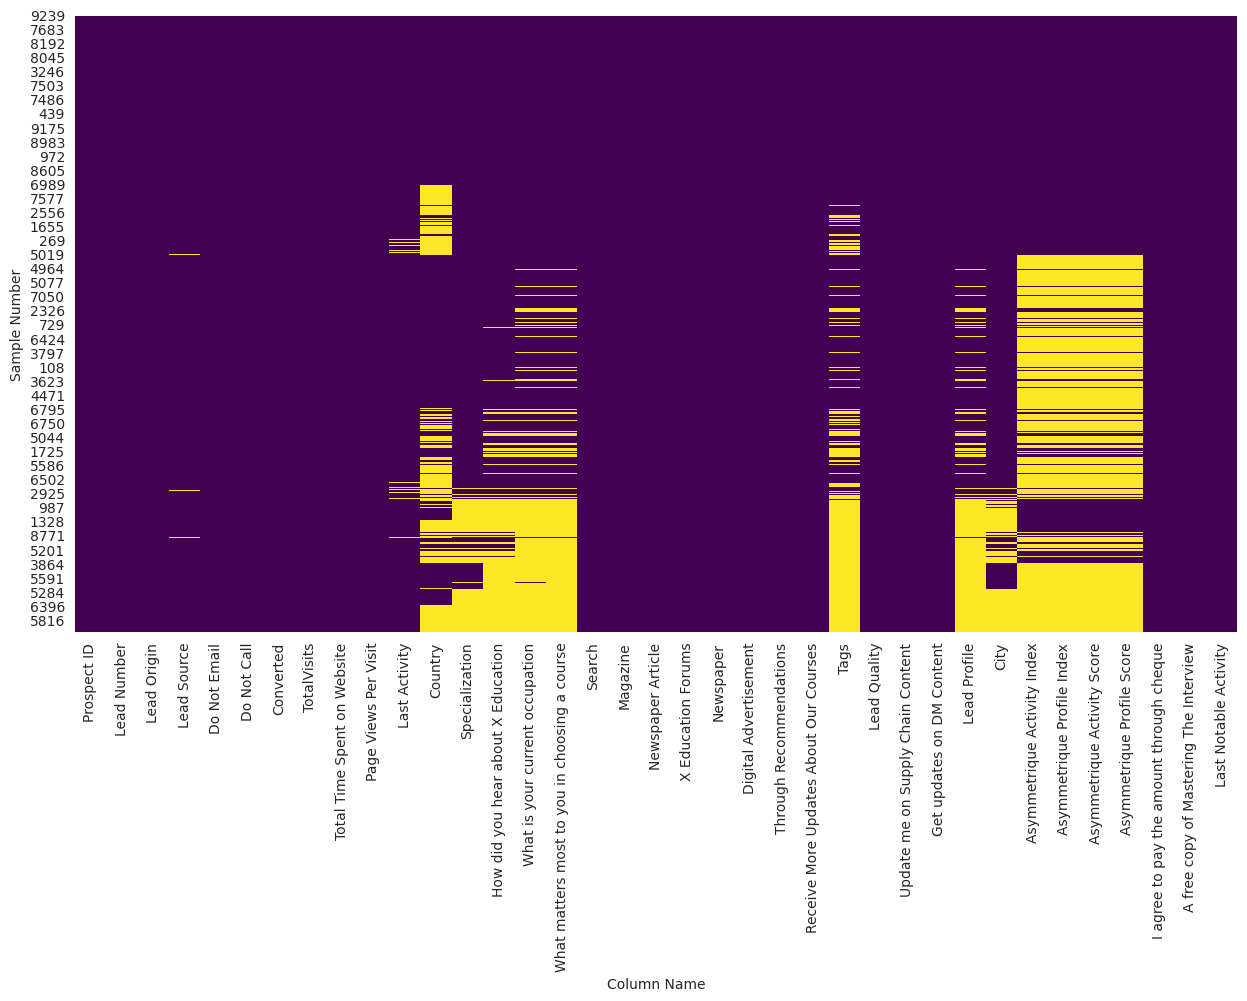

In [ ]:
#Visualizing missing values. We can see there are a lot of missing values in the dataset.

# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Name')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

The folloing columns have mainly the same issue where the data variability is non existant. Most records are either missing or pertain to one. For example the column country has 60% India and 20% missing, that is over 80% of the data for this column. A similar issue occurs in the other columns.

In [ ]:
#Dropping columns
columns_to_drop = ['How did you hear about X Education', 'Prospect ID', 'Tags', 'City', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'Specialization', 'Asymmetrique Activity Index',  'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
                   'Asymmetrique Profile Score']
df.drop(columns_to_drop, inplace = True, axis = 1)

In [ ]:
#Dropping the remaining null values from the dataset
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Lead Quality                                0
Update me on Supply Chain Content           0
Get updates on DM Content         

#Data Integration


In [ ]:
import pandas as pd

In [ ]:
df_2 = pd.read_csv("https://raw.githubusercontent.com/Praeksis27/Data_Wrangling/main/number-of-internet-users.csv")
df_2.head(5)

,Entity,Code,Year,Number of Internet users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


In [ ]:
 # counting the number of missing values (null values) in each column of df_2
df_2.nunique()

Entity                       224
Code                         214
Year                          31
Number of Internet users    5392
dtype: int64

In [ ]:
# counting the sum of missing values (NaN or None) for each column of the dataframe df_2.
df_2.isnull().sum()



Entity                        0
Code                        307
Year                          0
Number of Internet users      0
dtype: int64

In [ ]:
# based on the investication of the dataframe df_2, I will drop the code as it is not necessary.
df_2 = df_2.drop(columns=['Code'])


In [ ]:
#Now, I want to look at the dataset thouroughly, I notice that the year rage is from 1990 - 2020. I will do additional clean up to keep the range of year from 2018 - 2020
df_2_sort = df_2.sort_values(by='Year', ascending=False)
print(df_2_sort)

           Entity  Year  Number of Internet users
6405     Zimbabwe  2020                   4591211
2538        Haiti  2020                   3900847
356     Australia  2020                  23000366
4720     Portugal  2020                   8059531
2154       Gambia  2020                    939512
...           ...   ...                       ...
5656     Tanzania  1990                         0
2509        Haiti  1990                         0
3296        Libya  1990                         0
4566     Paraguay  1990                         0
0     Afghanistan  1990                         0

[6406 rows x 3 columns]


In [ ]:
# keeping year range from 2018 to 2020
df_2_year_range_18_20 = df_2[df_2['Year'].isin([2018, 2019, 2020])]
print(df_2_year_range_18_20)

           Entity  Year  Number of Internet users
23    Afghanistan  2018                   6163380
24    Afghanistan  2019                   6647431
25    Afghanistan  2020                   7170891
54         Africa  2018                 358062725
55         Africa  2019                 405332496
...           ...   ...                       ...
6373       Zambia  2019                   3087920
6374       Zambia  2020                   3747688
6403     Zimbabwe  2018                   3763048
6404     Zimbabwe  2019                   3854006
6405     Zimbabwe  2020                   4591211

[504 rows x 3 columns]


In [ ]:
df_2.dtypes

Entity                      object
Year                         int64
Number of Internet users     int64
dtype: object

In [ ]:
#checking to see if this will be a good match with the original df
df_2['Entity'].value_counts().head(5)
df_2.shape # = df.shape

(6406, 3)

In [ ]:
# additional investation to discover if the entity count is the same for the years that I plan on binning, which are 2018, 2019, 2020
total_unique_entities = df_2['Entity'].nunique()
print("Total unique number of entities:", total_unique_entities)


Total unique number of entities: 224


In [ ]:
# Assuming df is your DataFrame
df_2.rename(columns={'Entity': 'Country'}, inplace=True)


In [ ]:
df_2_2018= df_2[df_2['Year'] == 2018]
df_2_2019= df_2[df_2['Year'] == 2019]
df_2_2020 = df_2[df_2['Year'] == 2020]

In [ ]:
tot_unique_entity_2018 = df_2_2018['Country'].nunique()
tot_unique_entity_2019 = df_2_2019['Country'].nunique()
tot_unique_entity_2020 = df_2_2020['Country'].nunique()

In [ ]:
print("Total unique number of entities for 2018:", tot_unique_entity_2018)
print("Total unique number of entities for 2019:", tot_unique_entity_2019)
print("Total unique number of entities for 2020:", tot_unique_entity_2020)


In [ ]:
df_2_filtered = df_2[~df_2['Year'].isin(range(1990, 2018))]
print (df_2_filtered)

          Country  Year  Number of Internet users
23    Afghanistan  2018                   6163380
24    Afghanistan  2019                   6647431
25    Afghanistan  2020                   7170891
54         Africa  2018                 358062725
55         Africa  2019                 405332496
...           ...   ...                       ...
6373       Zambia  2019                   3087920
6374       Zambia  2020                   3747688
6403     Zimbabwe  2018                   3763048
6404     Zimbabwe  2019                   3854006
6405     Zimbabwe  2020                   4591211

[504 rows x 3 columns]


In [ ]:
# Assuming both DataFrames have a common column named 'Country' for merging
merged_df = pd.merge(df_2_filtered, df, on='Country', how='inner')

# Display the merge DataFrame
print(merged_df)

             Country  Year  Number of Internet users  Lead Number  \
0          Australia  2018                  21881803       657500   
1          Australia  2018                  21881803       655557   
2          Australia  2018                  21881803       630515   
3          Australia  2018                  21881803       615952   
4          Australia  2018                  21881803       610290   
...              ...   ...                       ...          ...   
20308  United States  2020                 305371298       580353   
20309  United States  2020                 305371298       580104   
20310        Vietnam  2018                  66295694       587249   
20311        Vietnam  2019                  65761807       587249   
20312        Vietnam  2020                  67944025       587249   

                   Lead Origin     Lead Source Do Not Email Do Not Call  \
0                          API  Organic Search           No          No   
1      Landing Page S

In [ ]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6406.0,2.004739e+03,8.851195e+00,1990.0,1997.0,2005.0,2012.0,2.020000e+03
Number of Internet users,6406.0,2.777390e+07,1.831681e+08,0.0,9202.5,228484.5,3494358.0,4.699886e+09


#Data Binning

In [ ]:
# Define the bins and labels
bins = [2017.9, 2018.9, 2019.9, 2020.9, float('inf')]  # Define the bin edges
labels = ['2018', '2019', '2020', '2021+']  # Define the labels for each bin

# Create the 'Year Category' column based on the bins
merged_df['Year Category'] = pd.cut(merged_df['Year'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new column
print(merged_df)


             Country  Year  Number of Internet users  Lead Number  \
0          Australia  2018                  21881803       657500   
1          Australia  2018                  21881803       655557   
2          Australia  2018                  21881803       630515   
3          Australia  2018                  21881803       615952   
4          Australia  2018                  21881803       610290   
...              ...   ...                       ...          ...   
20308  United States  2020                 305371298       580353   
20309  United States  2020                 305371298       580104   
20310        Vietnam  2018                  66295694       587249   
20311        Vietnam  2019                  65761807       587249   
20312        Vietnam  2020                  67944025       587249   

                   Lead Origin     Lead Source Do Not Email Do Not Call  \
0                          API  Organic Search           No          No   
1      Landing Page S

In [ ]:
# Filtering  the DataFrame to include only rows for the year 2020
merged_df_2020 = merged_df[merged_df['Year'] == 2020]

# Creating a pivot table to display the data for the year 2020
pivot_table_2020 = merged_df_2020.pivot_table(index='Country', columns='Year Category', values='A free copy of Mastering The Interview', aggfunc='count', fill_value=0)

# Removing columns for years 2018, 2019, and 2021+
pivot_table_2020 = pivot_table_2020.drop(['2018', '2019', '2021+'], axis=1)

# Displaying the pivot table for the year 2020
print(pivot_table_2020)



Year Category         2020
Country                   
Australia               13
Bahrain                  7
Bangladesh               2
Belgium                  2
Canada                   4
China                    2
Denmark                  1
France                   6
Germany                  4
Ghana                    2
Hong Kong                7
India                 6491
Indonesia                1
Italy                    2
Kenya                    1
Kuwait                   4
Liberia                  1
Malaysia                 1
Netherlands              2
Nigeria                  4
Oman                     6
Philippines              2
Qatar                   10
Russia                   1
Saudi Arabia            21
Singapore               24
South Africa             4
Sri Lanka                1
Sweden                   3
Switzerland              1
Tanzania                 1
Uganda                   2
United Arab Emirates    53
United Kingdom          15
United States           69
V

# Lambda Function Application

In [ ]:
# This function calculates the percentage of total visits
# A higher percentage of visits can indicate that the content on the website is relevant and valuable to the target audience
# A low percentage might suggest that the content needs improvement or better alignment with the audience's interests
merged_df['VisitPercentage'] = merged_df['TotalVisits'].apply(lambda x: (x / merged_df['TotalVisits'].sum()) * 100)


In [ ]:
# This function calculates whether the time spent on a website was high or low
# By categorizing time spent on the website, you can segment your audience based on their engagement levels
merged_df['TimeSpent'] = merged_df['Total Time Spent on Website'].apply(lambda x: 'High' if x > 500 else 'Low')


In [ ]:
# Creating a new column based on a calculation involving Total Visits and Total Time Spent on Website
merged_df['TotalInteraction'] = merged_df.apply(lambda row: row['TotalVisits'] + row['Total Time Spent on Website'], axis=1)


#Feature Engineering

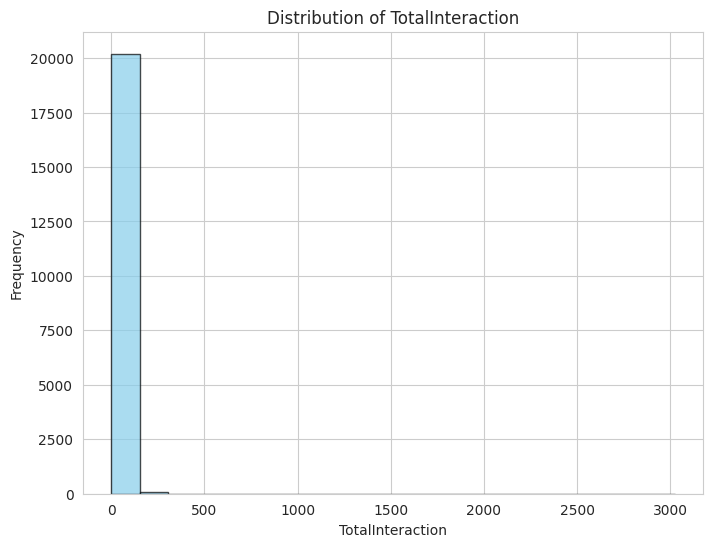

In [ ]:
# import matplotlib.pyplot as plt

#Interaction Features (calculates a new feature called 'TotalInteraction' by multiplying the values of two existing features/columns in the DataFrame)
merged_df['TotalInteraction'] = merged_df['TotalVisits'] * merged_df['Page Views Per Visit']

#Plot histogram of TotalInteraction
plt.figure(figsize=(8, 6))
plt.hist(merged_df['TotalInteraction'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of TotalInteraction')
plt.xlabel('TotalInteraction')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


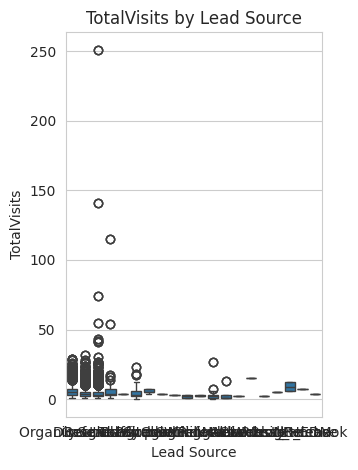

In [ ]:
# A box plot showing how the total number of visits varies across different specializations

# Boxplot of TotalVisits by Specialization
plt.subplot(1, 2, 2)
sns.boxplot(x= 'Lead Source', y='TotalVisits', data=merged_df)
plt.title('TotalVisits by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('TotalVisits')

plt.tight_layout()
plt.show()


#EDA

Key Insights:


1.   Most users that sent an SMS converted, perhaps ecouraging engagement via text could lead to higher conversions. [Supporting Data](#scrollTo=shkb9YnTgMoa)
2.   The last activity that users usually perform is to open an email, we need to get them further down the sales funnel, more engaging content may be able to do that [Supporting Data](#scrollTo=PdoEdAVkpmQo)
3.    By calculating click through rate and bounce rate on emails, we can identify if our email campaigns are succesful. Additionally, bounce rate can serve as a data quality indicator that it's time to clean up our contacts. General benchmarks (which can vary by industry) suggest that a click through rate of 2-5% is healthy while a bounce rate of under 2.5% is healthy. Given our data, this company's emails are well crafted and do well in terms of click through rate, however, they have a high bounce rate and therefore need more stringent data quality rules around email addresses. [Supporting Data](#scrollTo=PAI254MR6kv4)



Total Visits highly correlates with Page Views per visit which is totally relatable as they meassure the same thing but in different cadence. Other notable correlation are the Total Visits with Total tim spent on website.

<ipython-input-44-def25a129e13>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)


<Axes: >

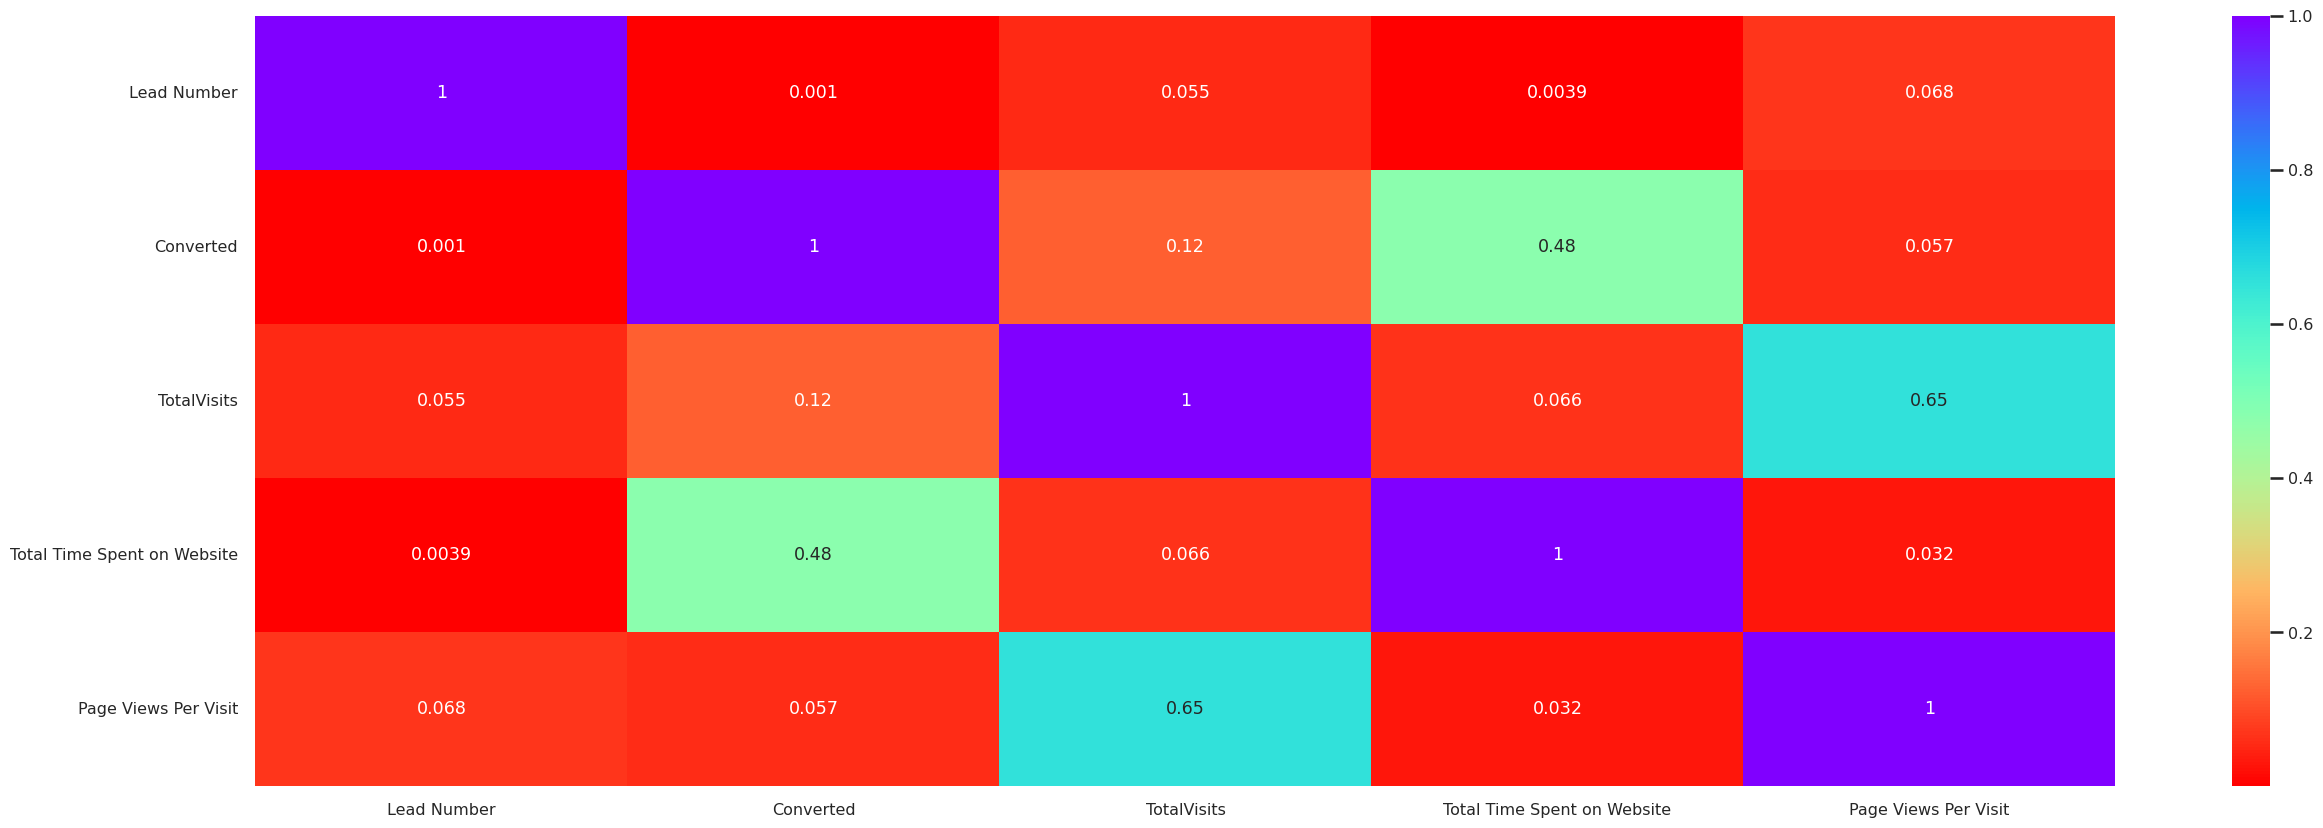

In [ ]:
#Taking a look at our numeric values and how they correlate with eachother.
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

sns.heatmap(df.iloc[:,:].corr(method='spearman'), cmap='rainbow_r', annot=True)

##Univariate Analysis

In [ ]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,Not Sure,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,Might be,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,Not Sure,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,Might be,No,No,No,No,Modified
6,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,...,No,No,No,No,Low in Relevance,No,No,No,No,Modified


<Axes: xlabel='Lead Quality', ylabel='count'>

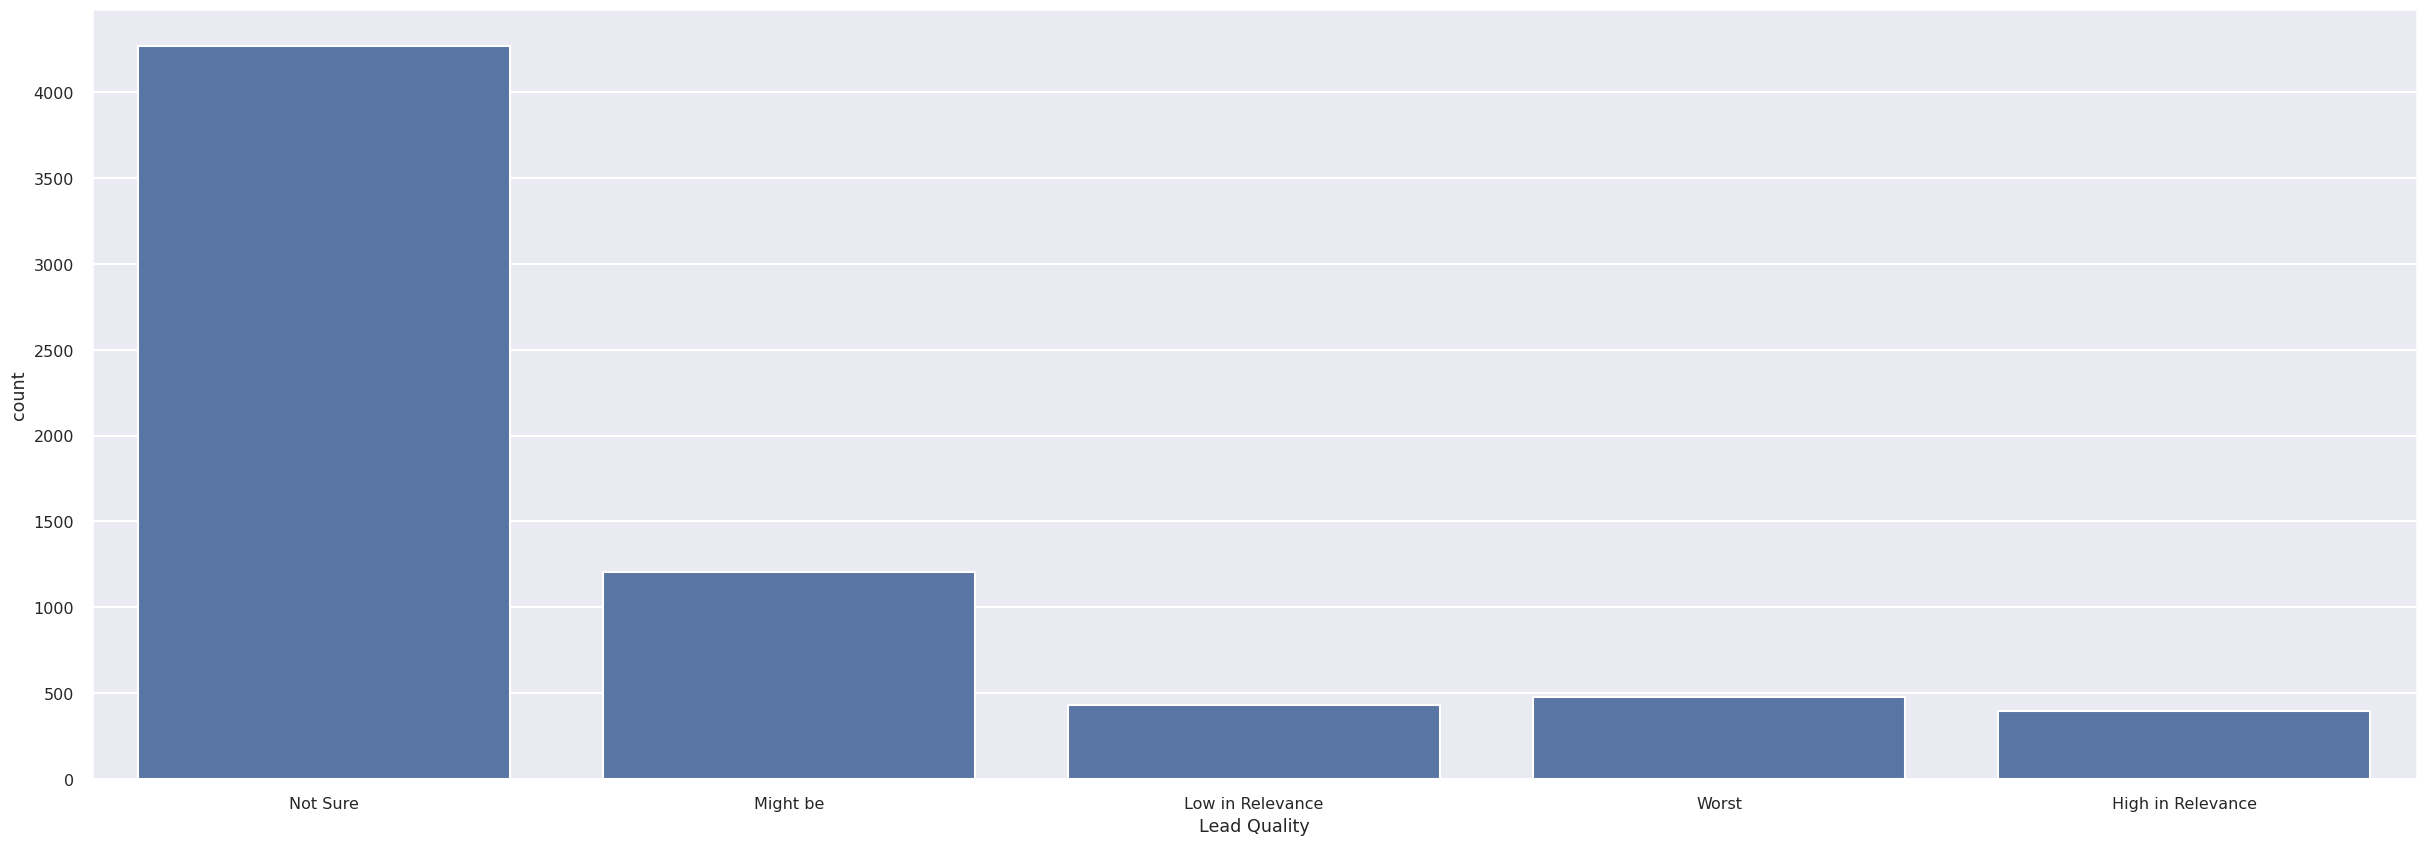

In [ ]:
sns.countplot(x="Lead Quality", data=df) # if this is a categorical column... then you can always reuse this code


In [ ]:
df['Lead Quality'].value_counts()


Not Sure             4269
Might be             1206
Worst                 478
Low in Relevance      431
High in Relevance     394
Name: Lead Quality, dtype: int64

###Key Insight
####Most users last activity is to open an email, we should ensure that this is engaging content designed to get them further down the sales funnel


<ipython-input-48-424fde218a98>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(edu.get_xticklabels(), rotation=90)


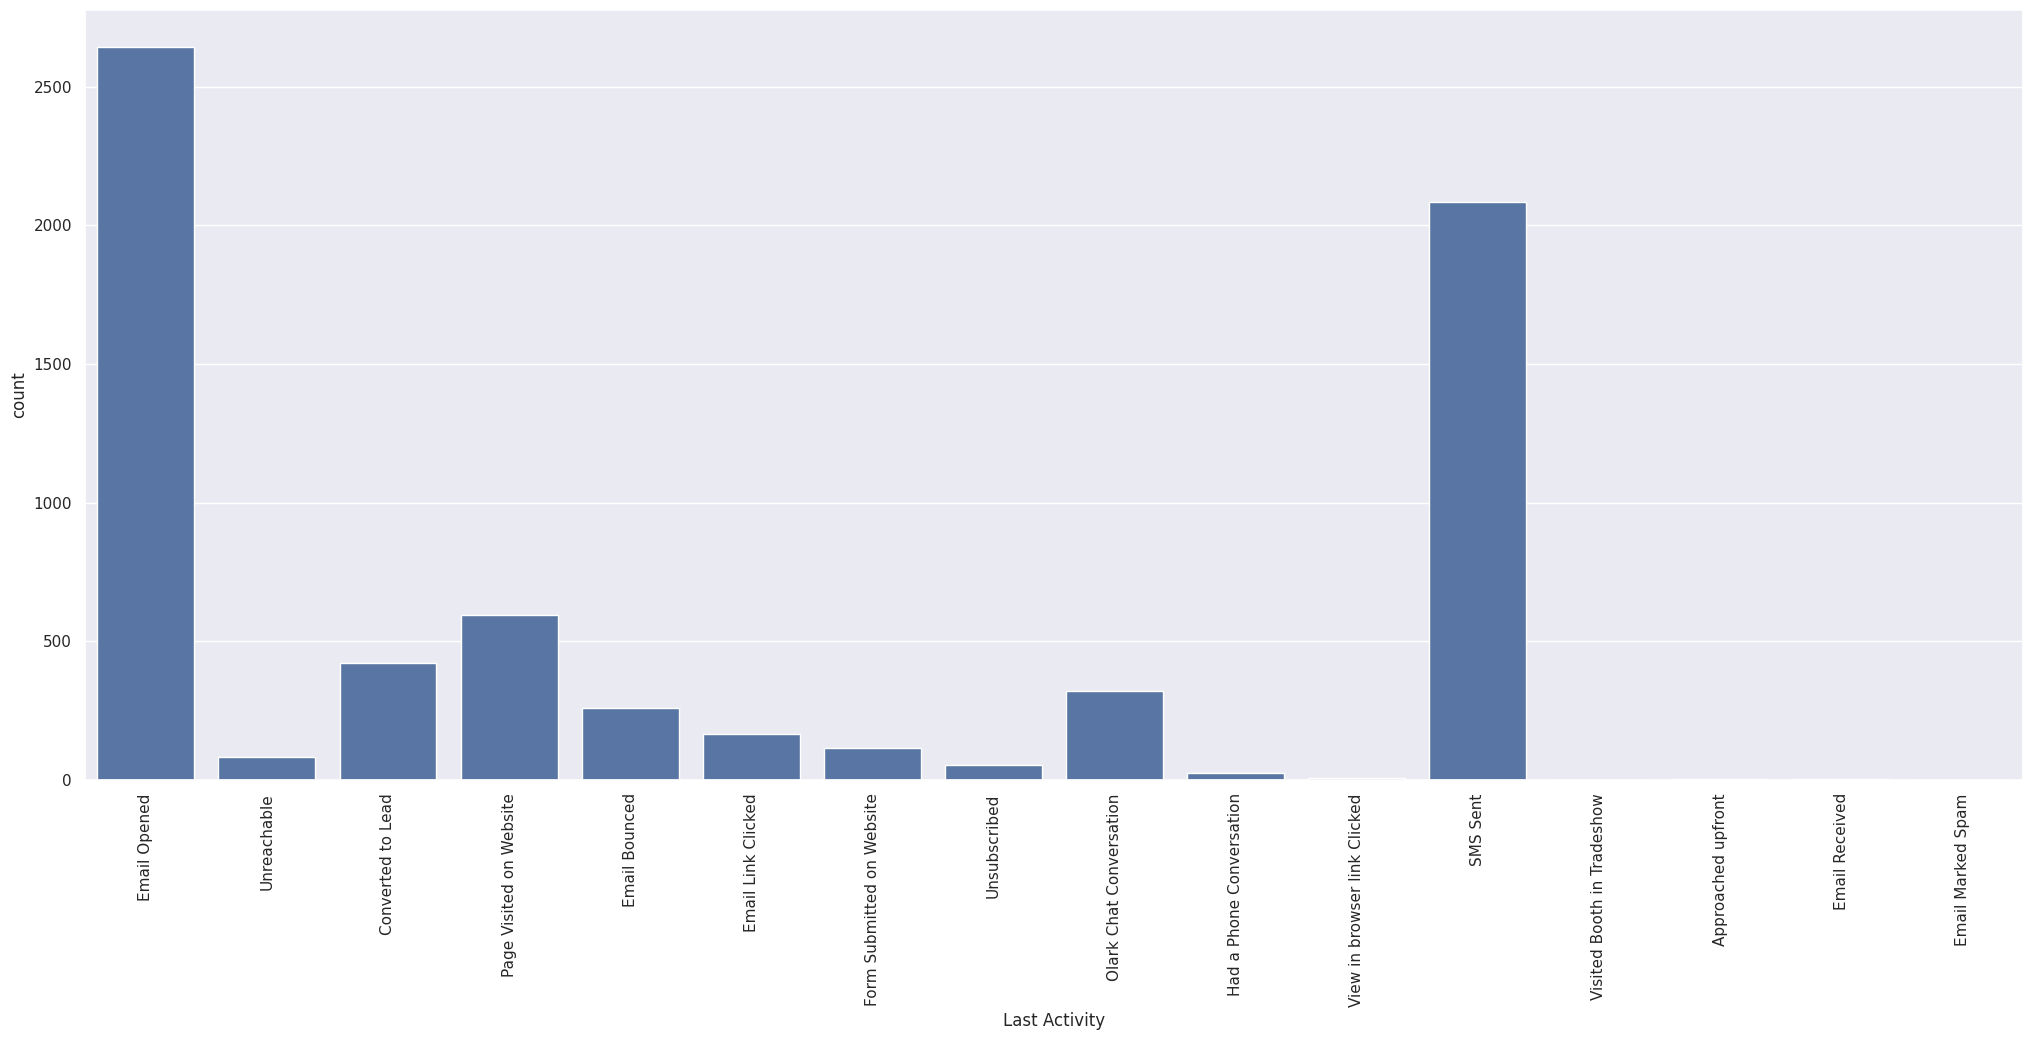

In [ ]:

# Adjust the figure size
sns.set(rc={'figure.figsize':(25, 10)})

# Create the countplot and rotate x-axis labels
edu = sns.countplot(x="Last Activity", data=df)
edu.set_xticklabels(edu.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
df['Last Activity'].value_counts()


Email Opened                    2645
SMS Sent                        2085
Page Visited on Website          596
Converted to Lead                420
Olark Chat Conversation          319
Email Bounced                    260
Email Link Clicked               166
Form Submitted on Website        116
Unreachable                       82
Unsubscribed                      53
Had a Phone Conversation          24
View in browser link Clicked       5
Approached upfront                 3
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

##Bivariate Analysis


###Key Insight
####Here we can see that most users that sent an SMS converted

<ipython-input-50-4147cf6060da>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(edu.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees


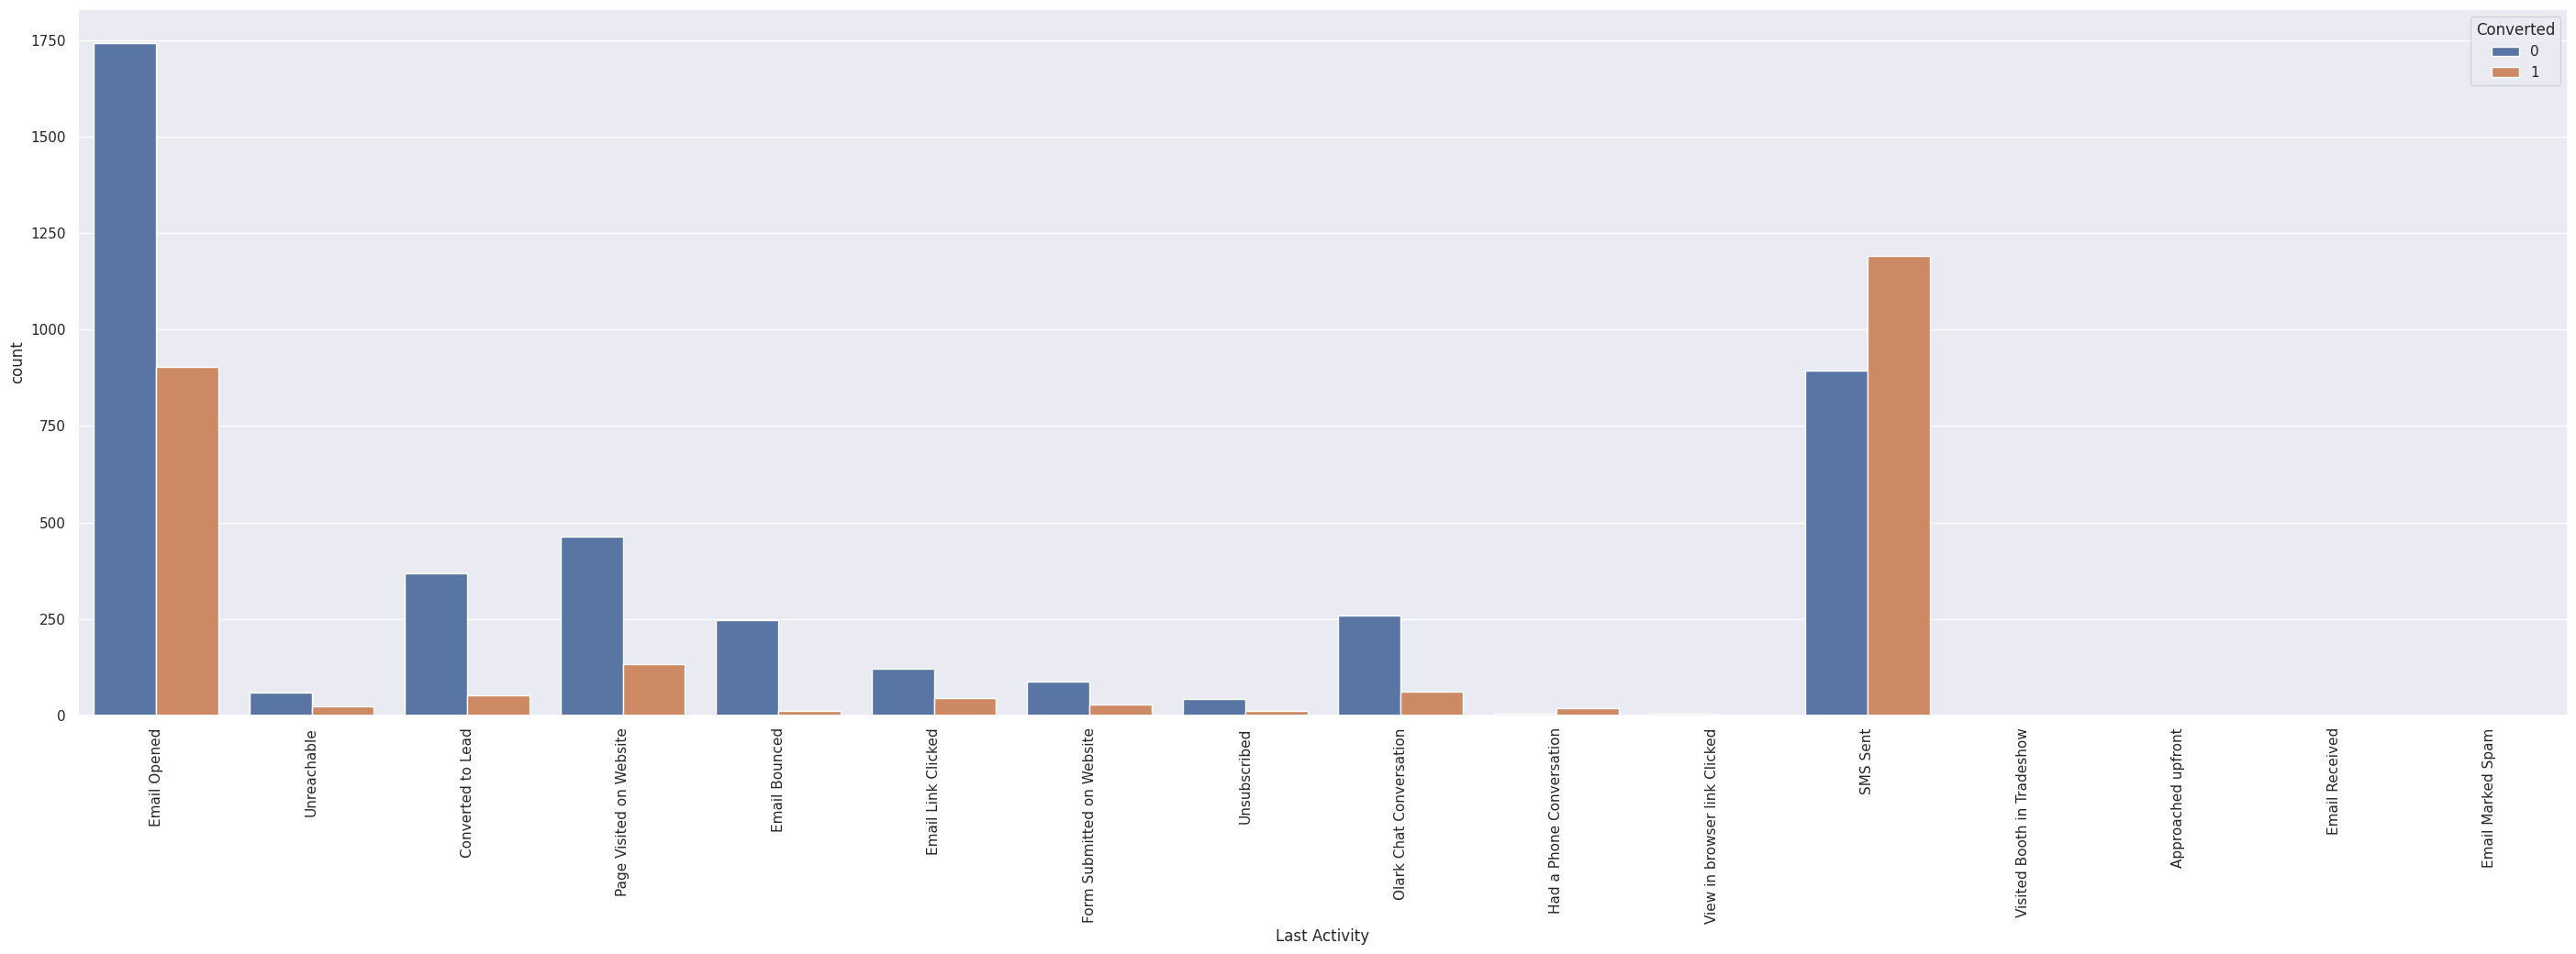

In [ ]:


sns.set(rc={'figure.figsize':(35,10)})
edu = sns.countplot(x='Last Activity', hue='Converted', data=df)
edu.set_xticklabels(edu.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

<ipython-input-51-75bf9b2accdd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  edu.set_xticklabels(edu.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees


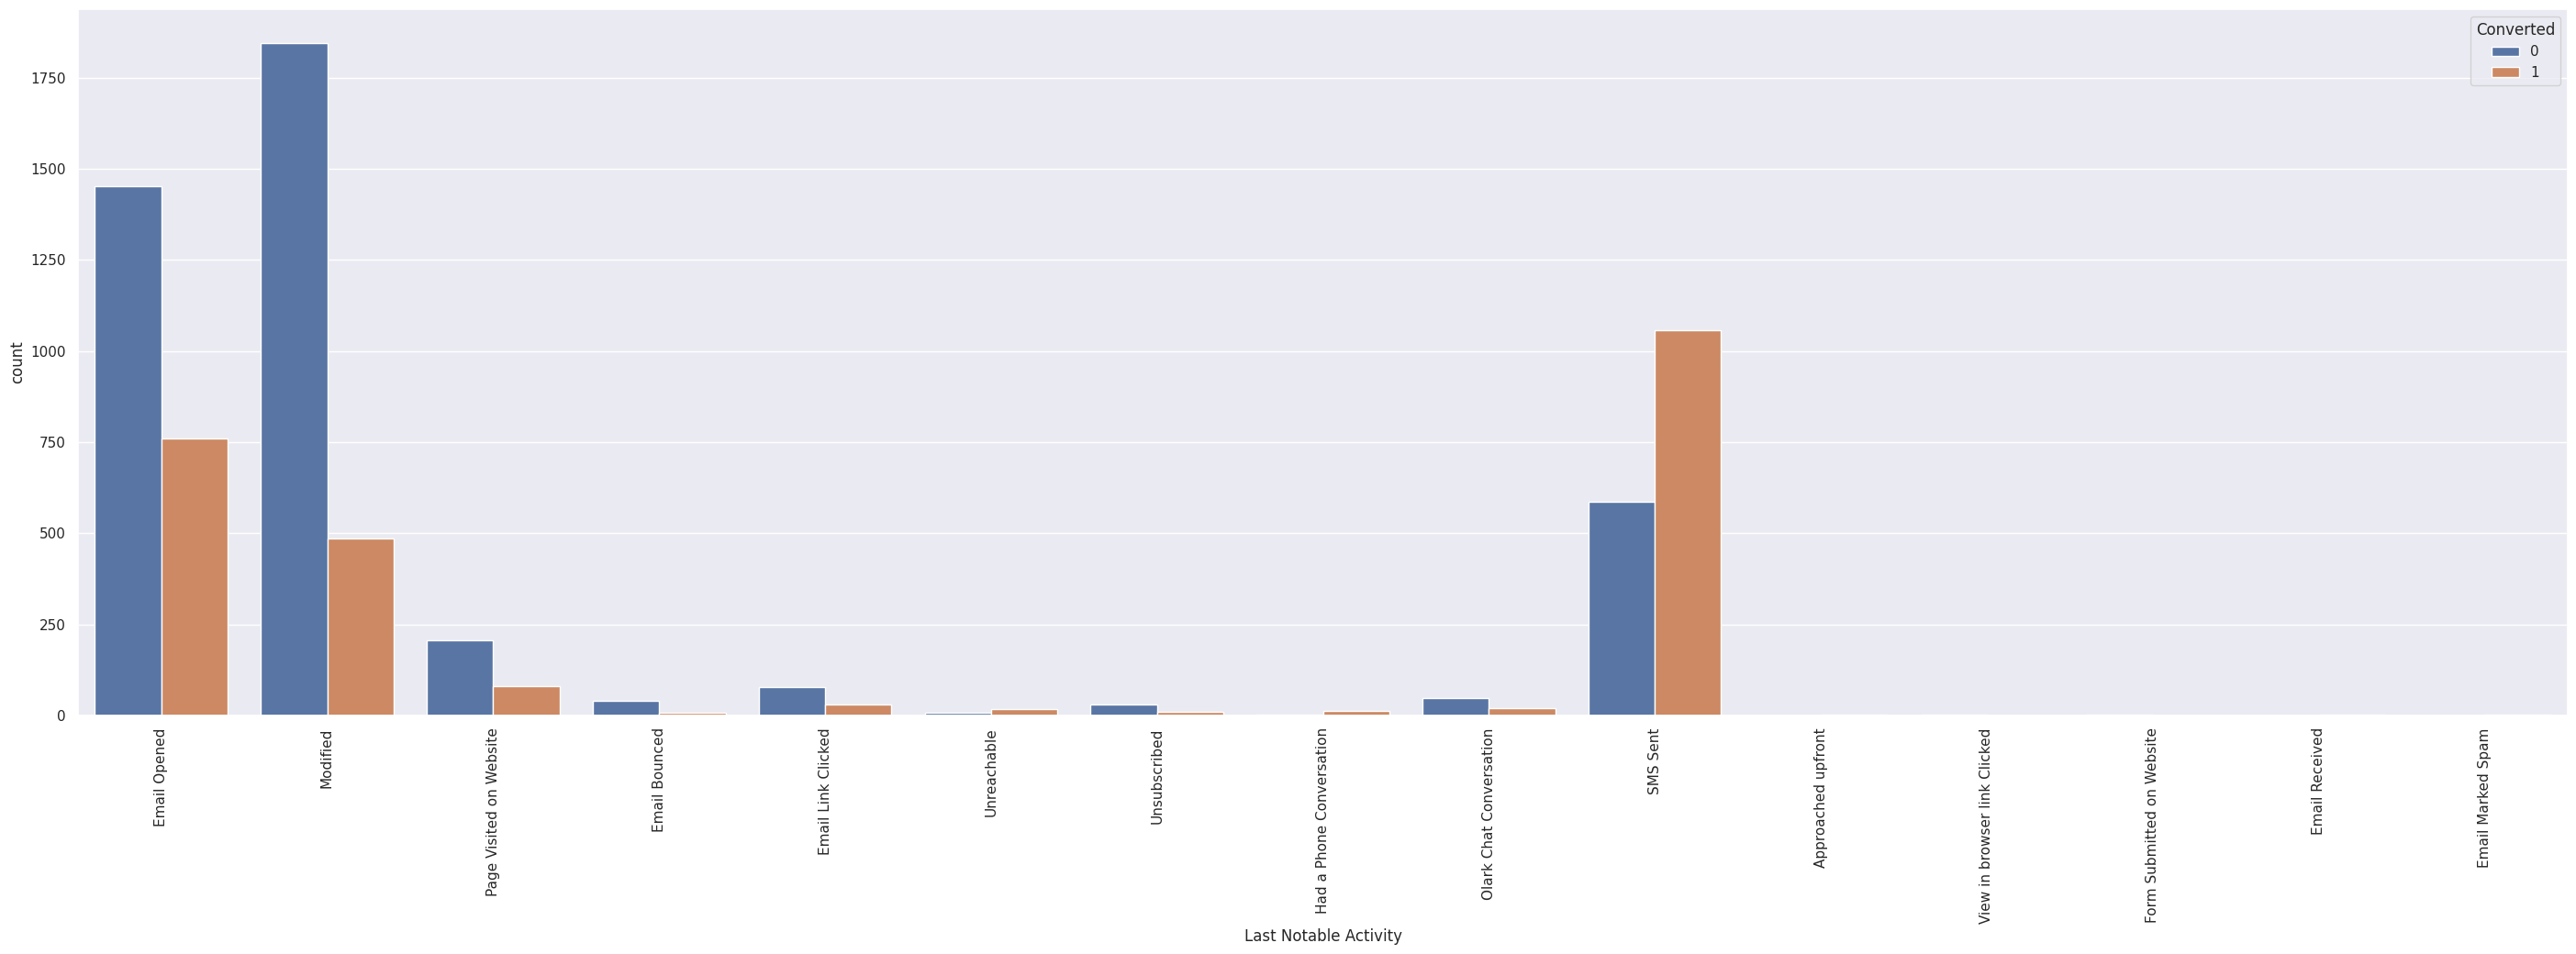

In [ ]:
sns.set(rc={'figure.figsize':(35,10)})
edu = sns.countplot(x='Last Notable Activity', hue='Converted', data=df)
edu.set_xticklabels(edu.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

###Key Insight
We can see the bounce rate is a bit high, so perhaps an initiative to clean contacts could be beneficial. Especially if cold calling is a technique that the company plans on leveraging as this could be an indicator of incorrect user data which would lead to a wasted opportunity

In [ ]:
bounced_emails_count = df[df['Last Activity'] == 'Email Bounced'].shape[0]

# Total number of leads
total_leads = df.shape[0]

# Calculate the bounce rate
bounce_rate = (bounced_emails_count / total_leads) * 100

# Display the result
print(f"Bounce Rate: {bounce_rate}%")

Bounce Rate: 3.8359398052522873%


In [ ]:
clicked_email = df[df['Last Activity'] == 'Email Link Clicked'].shape[0]

# Total number of leads
total_leads = df.shape[0]

# Calculate the bounce rate
click_through_rate = (clicked_email / total_leads) * 100

# Display the result
print(f"Email Click Through Rate: {click_through_rate}%")

Email Click Through Rate: 2.449100029507229%


#Feature Importance Analysis

After performing the feature analysis, we determined (unsurprisingly) that the measures related to how a user engages with the site are most impactful when it comes to conversion.

The most impactful of these measures are: Visit Percentage, Total Page Views, Time Spent on Website


[Click here to see Supporting Data](#scrollTo=ImZuP8XxW2eC)

In [ ]:
# #Import the Libraries

# #Dataframe and numerical library
# import pandas as pd
# import numpy as np

# #Visualization
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# #Machine Learming Model
# from sklearn.linear_model import LogisticRegression

CPU times: user 872 ms, sys: 178 ms, total: 1.05 s
Wall time: 888 ms


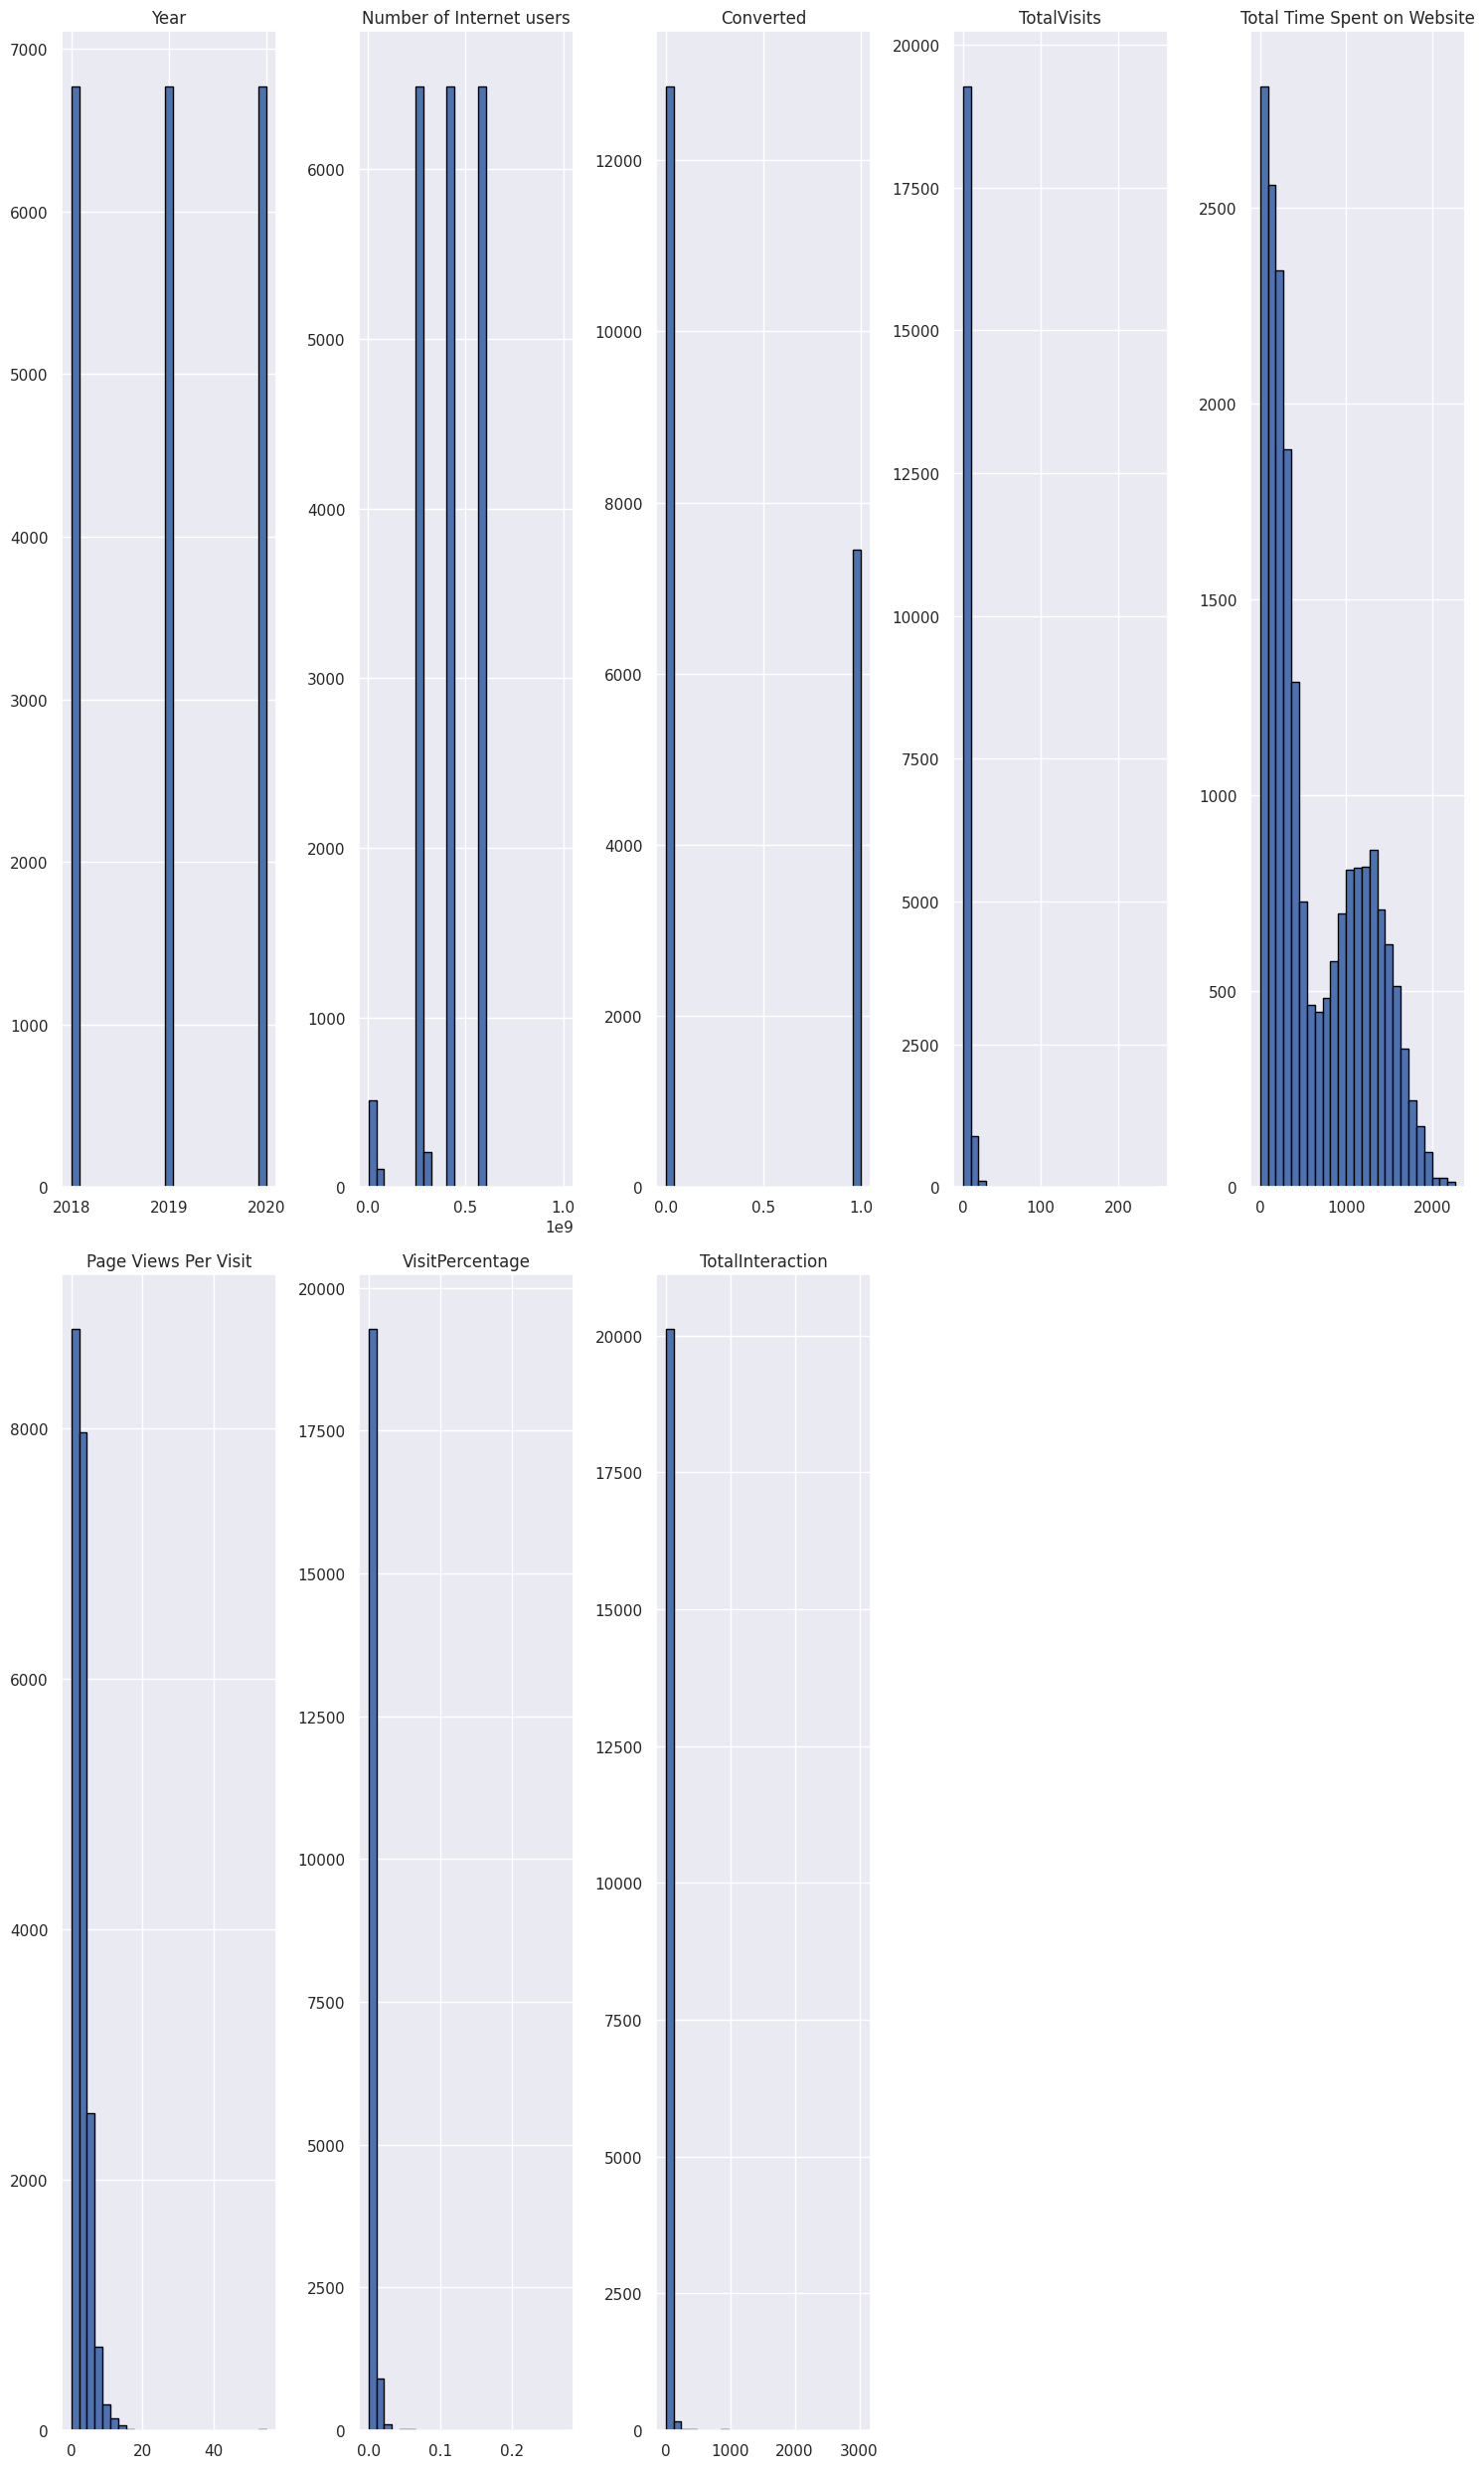

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
features = merged_df.drop(['Lead Number'], axis=1)
features.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

In [ ]:
numerics = ['int16', 'int32', 'int64','float64']
catDF = merged_df.select_dtypes(exclude=numerics)
numDF = merged_df.select_dtypes(include=numerics)

In [ ]:
print(catDF.head())
numDF.head()

     Country              Lead Origin     Lead Source Do Not Email  \
0  Australia                      API  Organic Search           No   
1  Australia  Landing Page Submission          Google           No   
2  Australia  Landing Page Submission          Google           No   
3  Australia  Landing Page Submission  Direct Traffic           No   
4  Australia  Landing Page Submission          Google           No   

  Do Not Call Last Activity Search Magazine Newspaper Article  \
0          No  Email Opened     No       No                No   
1          No   Unreachable     No       No                No   
2          No      SMS Sent     No       No                No   
3          No  Email Opened     No       No                No   
4          No  Email Opened     No       No                No   

  X Education Forums  ... Through Recommendations  \
0                 No  ...                      No   
1                 No  ...                      No   
2                 No  ...    

,Year,Number of Internet users,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,VisitPercentage,TotalInteraction
0,2018,21881803,657500,0,5.0,345,5.0,0.005406,25.0
1,2018,21881803,655557,0,5.0,663,5.0,0.005406,25.0
2,2018,21881803,630515,0,4.0,464,4.0,0.004325,16.0
3,2018,21881803,615952,0,6.0,748,2.0,0.006487,12.0
4,2018,21881803,610290,0,5.0,44,2.5,0.005406,12.5


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
# Scale all numeric columns, we do this to ensure that no one feature dominates the analysis
numDF = pd.DataFrame(scaler.fit_transform(numDF.values), columns=numDF.columns, index=numDF.index)
numDF.head()

,Year,Number of Internet users,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,VisitPercentage,TotalInteraction
0,-0.5,-1.181918,1.000435,0.0,0.333333,-0.055615,1.00,0.333333,1.142857
1,-0.5,-1.181918,0.953519,0.0,0.333333,0.284492,1.00,0.333333,1.142857
2,-0.5,-1.181918,0.348859,0.0,0.000000,0.071658,0.50,0.000000,0.500000
3,-0.5,-1.181918,-0.002777,0.0,0.666667,0.375401,-0.50,0.666667,0.214286
4,-0.5,-1.181918,-0.139491,0.0,0.333333,-0.377540,-0.25,0.333333,0.250000


In [ ]:
#There is quite a bit of categorical data, this will need to be one hot encoded except for the target which we will label encode
print(catDF.head())
numDF.head()

     Country              Lead Origin     Lead Source Do Not Email  \
0  Australia                      API  Organic Search           No   
1  Australia  Landing Page Submission          Google           No   
2  Australia  Landing Page Submission          Google           No   
3  Australia  Landing Page Submission  Direct Traffic           No   
4  Australia  Landing Page Submission          Google           No   

  Do Not Call Last Activity Search Magazine Newspaper Article  \
0          No  Email Opened     No       No                No   
1          No   Unreachable     No       No                No   
2          No      SMS Sent     No       No                No   
3          No  Email Opened     No       No                No   
4          No  Email Opened     No       No                No   

  X Education Forums  ... Through Recommendations  \
0                 No  ...                      No   
1                 No  ...                      No   
2                 No  ...    

,Year,Number of Internet users,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,VisitPercentage,TotalInteraction
0,-0.5,-1.181918,1.000435,0.0,0.333333,-0.055615,1.00,0.333333,1.142857
1,-0.5,-1.181918,0.953519,0.0,0.333333,0.284492,1.00,0.333333,1.142857
2,-0.5,-1.181918,0.348859,0.0,0.000000,0.071658,0.50,0.000000,0.500000
3,-0.5,-1.181918,-0.002777,0.0,0.666667,0.375401,-0.50,0.666667,0.214286
4,-0.5,-1.181918,-0.139491,0.0,0.333333,-0.377540,-0.25,0.333333,0.250000


In [ ]:
catDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20313 entries, 0 to 20312
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Country                                   20313 non-null  object  
 1   Lead Origin                               20313 non-null  object  
 2   Lead Source                               20313 non-null  object  
 3   Do Not Email                              20313 non-null  object  
 4   Do Not Call                               20313 non-null  object  
 5   Last Activity                             20313 non-null  object  
 6   Search                                    20313 non-null  object  
 7   Magazine                                  20313 non-null  object  
 8   Newspaper Article                         20313 non-null  object  
 9   X Education Forums                        20313 non-null  object  
 10  Newspaper             

In [ ]:
# Converting all the categorical variables to dummy variables
catDF = pd.get_dummies(catDF)
catDF.shape

(20313, 124)

In [ ]:
catDF.head(2)

,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Year Category_2018,Year Category_2019,Year Category_2020,Year Category_2021+,TimeSpent_High,TimeSpent_Low
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Drop the target variable from the DF
numDF.drop(['Converted'], axis=1, inplace=True)

In [ ]:
# Preparing the Y variable
Y = merged_df['Converted']
# Tree models have trouble turning strings to float to labeling the target variable so there is a complete feature matrix
print(Y.shape)

(20313,)


In [ ]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([catDF, numDF], axis=1)
print(X.shape)

(20313, 132)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (20313, 132)
Shape of Y: (20313,)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(X.shape)
X.isnull().sum()

(20313, 132)


Country_Australia              0
Country_Bahrain                0
Country_Bangladesh             0
Country_Belgium                0
Country_Canada                 0
                              ..
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
VisitPercentage                0
TotalInteraction               0
Length: 132, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Using train_test_split to Split Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
# First we build and train our Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

                                         feature  importance
128                  Total Time Spent on Website    0.186914
122                               TimeSpent_High    0.162826
123                                TimeSpent_Low    0.142817
96                         Lead Quality_Not Sure    0.125846
95                         Lead Quality_Might be    0.070871
..                                           ...         ...
81                                   Magazine_No    0.000000
99                  Get updates on DM Content_No    0.000000
100  I agree to pay the amount through cheque_No    0.000000
21                           Country_Philippines    0.000000
98          Update me on Supply Chain Content_No    0.000000

[132 rows x 2 columns]


In [ ]:
# Permutation Importance
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean

KeyboardInterrupt: 

In [ ]:
print(perm.to_string())

NameError: name 'perm' is not defined

In [ ]:
# Sorting the DataFrame by 'AVG_Importance' in descending order
perm_sorted = perm.sort_values(by='AVG_Importance', ascending=False)

# Printing the sorted DataFrame
print(perm_sorted.to_string())


NameError: name 'perm' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


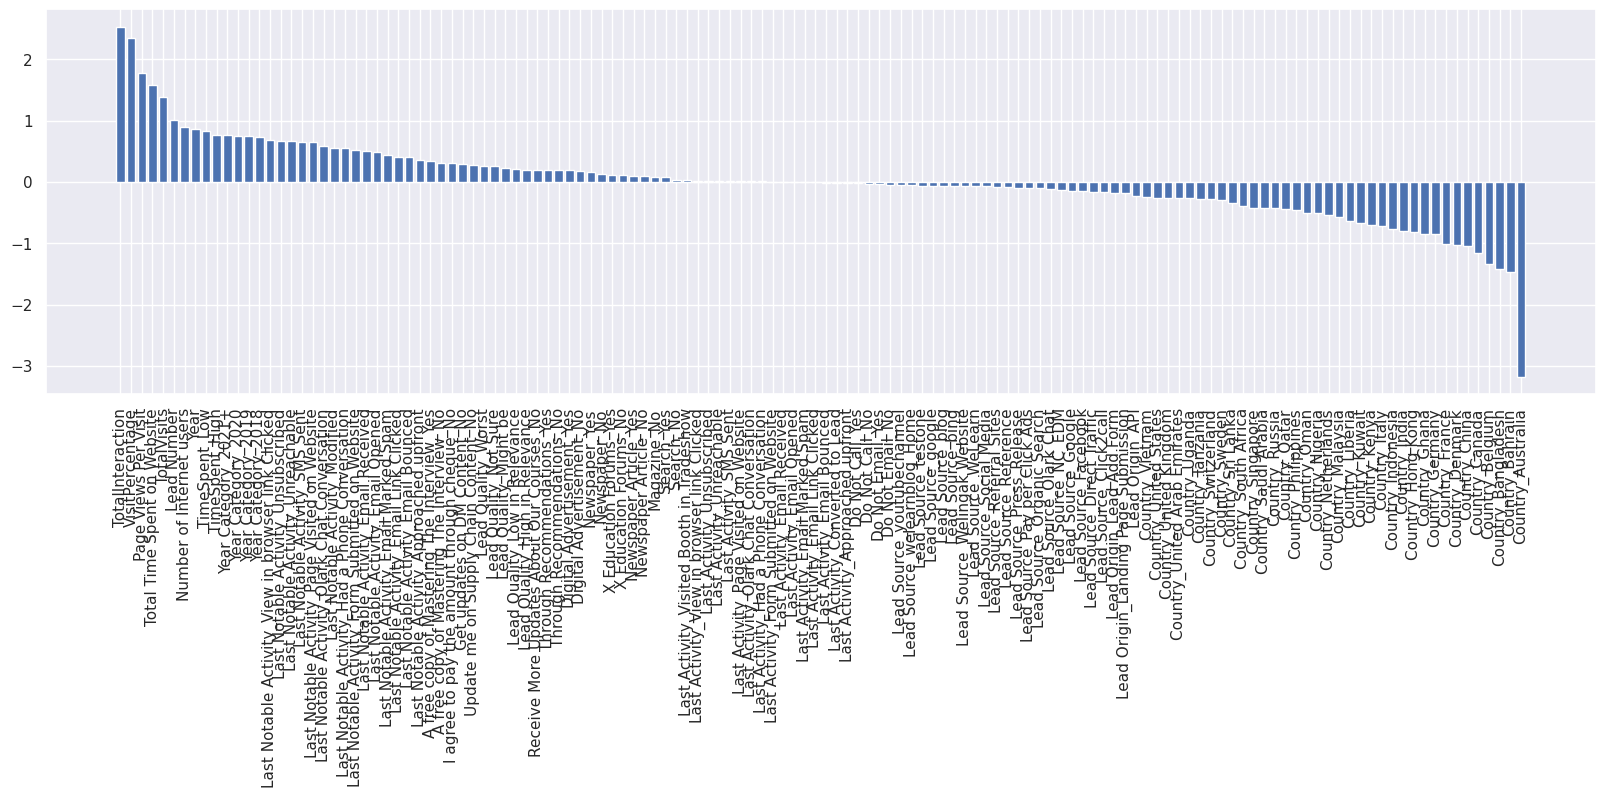

In [ ]:
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(20,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
X.to_csv("FeatureImportance.csv")